In [30]:
from Bio import SeqIO

blast_file = "CO1_t1_blastout.txt"
blast_dict = {}
with open(blast_file, "r") as file:
    for line in file:
        if line.startswith("#"):  # Skip comment lines
            continue
        parts = line.strip().split("\t")
        #print(parts)
        query_id = parts[0]
        subject_id = parts[1]
        query_start = int(parts[3]) - 1  # Convert to 0-based index
        query_end = int(parts[4]) - 1  # Convert to 0-based index
        sequence = parts[5]  # Assuming the aligned sequence is in this column
        reference = parts[6]

        # Create an empty alignment array of the length of the query alignment
        alignment_length = query_end - query_start + 1
        alignment_array = [""] * alignment_length

        key = (query_id, subject_id)
        value = (alignment_array, sequence, query_start, query_end, reference)
        blast_dict[key] = value
        blast_results = blast_dict

In [31]:
print(blast_results)

{('query0_0', 'EU366583.1'): (['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'CTATCGGGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA', 3, 81, 'CTATCGGGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_20', 'EU366583.1'): (['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'ACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAATTCTTGGGGCAATTAATTTT', 22, 101, 'ACGCCGGAGCATCCGTAGACCTGACTATTTTT

In [6]:
for (query_id, subject_id), (alignment_array, query_sequence, query_start, query_end, reference_sequence) in blast_results.items():
    ref_index = 0
    query_index = 0

    while query_index < len(query_sequence) and ref_index < len(reference_sequence):
        if query_sequence[query_index] == reference_sequence[ref_index]:
            alignment_array[ref_index] = query_sequence[query_index]
            query_index += 1
        else:
            alignment_array[ref_index] = '-'
        ref_index += 1

In [7]:
print(blast_results)

{('query0_0', 'EU366583.1'): (['C', 'T', 'A', 'T', 'C', 'G', 'G', 'G', 'C', 'A', 'A', 'T', 'C', 'T', 'G', 'G', 'C', 'T', 'C', 'A', 'C', 'G', 'C', 'C', 'G', 'G', 'A', 'G', 'C', 'A', 'T', 'C', 'C', 'G', 'T', 'A', 'G', 'A', 'C', 'C', 'T', 'G', 'A', 'C', 'T', 'A', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'T', 'T', 'C', 'A', 'T', 'C', 'T', 'T', 'G', 'C', 'G', 'G', 'G', 'T', 'A', 'T', 'C', 'T', 'C', 'A', 'T', 'C', 'A', 'A'], 'CTATCGGGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA', 3, 81, 'CTATCGGGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_20', 'EU366583.1'): (['A', 'C', 'G', 'C', 'C', 'G', 'G', 'A', 'G', 'C', 'A', 'T', 'C', 'C', 'G', 'T', 'A', 'G', 'A', 'C', 'C', 'T', 'G', 'A', 'C', 'T', 'A', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'T', 'T', 'C', 'A', 'T', 'C', 'T', 'T', 'G', 'C', 'G', 'G', 'G', 'T', 'A', 'T', 'C', 'T', 'C', 'A', 'T', 'C', 'A', 'A', 'T', 'T', 'C', 'T', 'T', 'G', 'G', 'G', 'G', 'C', 'A', 'A', 'T', 'T'

In [8]:
from Bio import AlignIO

msa_file = "CO1_rand100_MSA.fasta"
alignment = AlignIO.read(msa_file, "fasta")
msa_dict = {}
    
for record in alignment:
    subject_id = record.id
    sequence = str(record.seq).upper()
    sequence_array = list(sequence)
    match_count_array = [0] * len(sequence)  # Initialize the match count array with zeros
    msa_dict[subject_id] = (sequence_array, match_count_array)
    
print(msa_dict) 

{'KY454450.1': (['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'A', 'C', 'T', 'C', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'A', 'T', 'C', 'T', 'C', 'G', 'C', 'C', 'C', 'A', 'T', 'G', 'C', 'T', 'G', 'G', 'G', 'C', 'C', 'T', 'T', 'C', 'C', 'G', 'T', 'T', 'G', 'A', 'C', 'T', 'T', 'A', 'A', 'C', 'C', 'A', 'T', 'C', 'T', 'T', 'C', 'T', 'C', 'C', 'C', 'T', 'C', 'C', 'A', 'C', 'T', 'T', 'G', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'T', 'G', 'T', 'C', 'A', 'T', 'C', 'T', 'A', 'T', 'T', 'T', 'T', 'A', 'G', 'G', 'T', 'G', 'C', 'A', 'A', 'T', 'T', 'A', 'A', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'C', 'A', 'T', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C', 'T', 'G', 'C', 'C', 'A', 'T', 'C', 'T', 'C', 'C', 'C', 'A', 'A', 'T', 'A', 'T', 'C', 'A', 'A', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'T', 'C', 'T', 'T', 'T', 'G', 'T', 'A', 'T', 'G', 'A', 'T', 'C'

In [9]:
print(msa_dict["EU366583.1"])
print(blast_results)

(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'C', 'C', 'T', 'C', 'T', 'A', 'T', 'C', 'G', 'G', 'G', 'C', 'A', 'A', 'T', 'C', 'T', 'G', 'G', 'C', 'T', 'C', 'A', 'C', 'G', 'C', 'C', 'G', 'G', 'A', 'G', 'C', 'A', 'T', 'C', 'C', 'G', 'T', 'A', 'G', 'A', 'C', 'C', 'T', 'G', 'A', 'C', 'T', 'A', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'C', 'T', 'T', 'C', 'A', 'T', 'C', 'T', 'T', 'G', 'C', 'G', 'G', 'G', 'T', 'A', 'T', 'C', 'T', 'C', 'A', 'T', 'C', 'A', 'A', 'T', 'T', 'C', 'T', 'T', 'G', 'G', 'G', 'G', 'C', 'A', 'A', 'T', 'T', 'A', 'A', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'C', 'C', 'A', 'C', 'A', 'A', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'C', 'A', 'T', 'G', 'A', 'A', 'G', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'A', 'A', 'T', 'C', 'T', 'C', 'A', 'C', 'A', 'A', 'T', 'A', 'C', 'C', 'A', 'G', 'A', 'C', 'G', 'C', 'C', 'C', 'C', 'T', 'A', 'T', 'T', 'T', 'G', 'T', 'C', 'T', 'G', 'A', 'T', 'C', 'T', 'G', 'T'

In [10]:
for (query_id, subject_id), (alignment_array, query_sequence, query_start, query_end, reference) in blast_results.items():
    if subject_id not in msa_dict:
        print(f"Subject ID {subject_id} not found in MSA.")
        continue

    msa_sequence_array, match_count_array = msa_dict[subject_id]

    # Find the start position in the MSA sequence corresponding to the query start position
    msa_index = 0
    non_gap_count = 0
    while non_gap_count < query_start and msa_index < len(msa_sequence_array):
        if msa_sequence_array[msa_index] != '-':
            non_gap_count += 1
        msa_index += 1

    # Now msa_index is at the start position of the query sequence in the MSA sequence
    #ref_index = query_start
    query_index = 0
    while msa_index < len(msa_sequence_array) and query_index < len(query_sequence):
        # Increment match count if characters match or if both are gaps
        if query_sequence[query_index] == msa_sequence_array[msa_index]:
            match_count_array[msa_index] += 1
            query_index += 1
        msa_index += 1
        #ref_index += 1

In [11]:
match_counts = {}
for subject_id, (_, match_count_array) in msa_dict.items():
    match_counts[subject_id] = sum(match_count_array)
print(match_counts["EU366583.1"]) 

1031


In [12]:
msa_length = len(next(iter(msa_dict.values()))[0])
merged_counts = [0] * msa_length

for _, (_, match_count_array) in msa_dict.items():
    for i in range(msa_length):
        merged_counts[i] += match_count_array[i]
    
print(merged_counts)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 

In [29]:
len(list(msa_dict.values())[0][1])

343

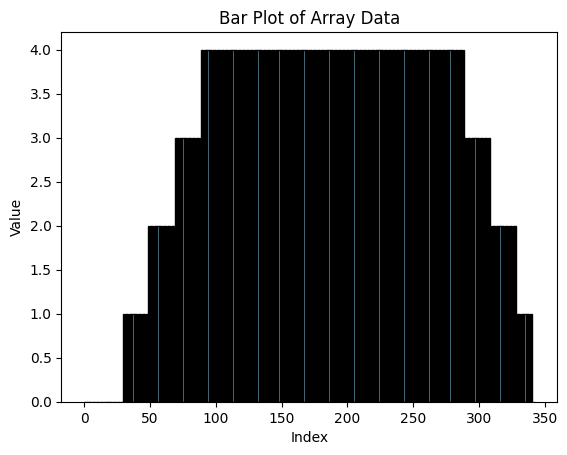

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = merged_counts

# Indices of the array
x = np.arange(len(data))

# Create the bar plot
plt.bar(x, data, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Bar Plot of Array Data')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the plot
plt.show()